In [36]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import tree

In [3]:
#We should try to run this again but with categorical data taken out
data = pd.read_csv('Data/CleanSpotifyData.csv')

In [5]:
# Normalize the Data for training
columns = list(data.columns)
#remove the genre label from the data we will run k-means on
columns.remove('genre')
normalized_data = stats.zscore(data[columns])

In [14]:
inertias = []
mapping = {}
K = range(1, 25)

for k in K:   
    
    kMeans =  KMeans(n_clusters=k).fit(normalized_data)
    kMeans.fit(normalized_data)
              
    inertias.append(kMeans.inertia_)
    
    mapping[k] = kMeans.inertia_ 
    
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


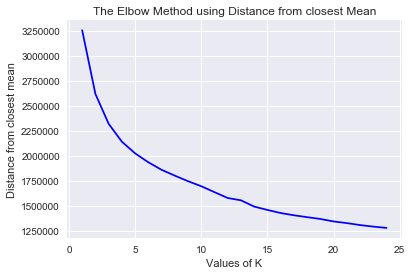

In [16]:

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distance from closest mean') 
plt.title('The Elbow Method using Distance from closest Mean') 
plt.show() 


In [18]:
#from this we choose k = 8
for key,val in mapping.items(): 
    print(str(key)+' : '+str(val)) 


1 : 3258149.999999999
2 : 2620192.0931501873
3 : 2320996.5483323573
4 : 2141484.811332431
5 : 2024547.4015091835
6 : 1935165.956596812
7 : 1859762.1957957156
8 : 1801283.4055985291
9 : 1745389.598872076
10 : 1695109.7887662728
11 : 1635758.4072870328
12 : 1577081.2810910868
13 : 1553959.8368336367
14 : 1490987.4529043683
15 : 1457566.7723796074
16 : 1426516.478426848
17 : 1404195.1181409685
18 : 1385202.4054276685
19 : 1367042.160339952
20 : 1342208.0419237802
21 : 1325702.4044028649
22 : 1306062.8133229543
23 : 1290388.307198656
24 : 1277399.8750165566


In [6]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(normalized_data)
labels = kmeans.labels_

data['cluster'] = labels
columns.extend(['cluster'])

C:\Users\thesm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


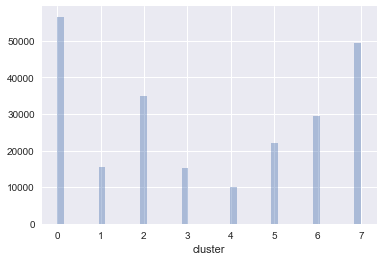

In [123]:

#data['cluster'].hist()
ax = sns.distplot(data['cluster'], kde = False)
plt.show()

In [121]:
data.loc[data['cluster'] == 0]['genre'].value_counts()


Hip-Hop             4101
Rap                 4026
Pop                 3975
Dance               3645
Rock                3599
Country             3586
Reggae              3564
Reggaeton           3306
R&B                 2887
Indie               2885
Children’s Music    2813
Alternative         2615
Soul                2540
Folk                2323
Ska                 2315
Blues               2030
Electronic          1478
Jazz                1139
Anime               1008
Children's Music     999
World                875
Movie                596
Comedy               118
Classical             52
Soundtrack            23
A Capella              8
Name: genre, dtype: int64

In [70]:
data.loc[data['cluster'] == 1]['genre'].value_counts()

Opera               1984
Movie               1208
Blues               1046
Folk                 989
World                883
Jazz                 825
Soundtrack           815
Soul                 806
Classical            730
Children's Music     729
Indie                632
Anime                579
Country              540
R&B                  519
Alternative          488
Children’s Music     454
Rock                 418
Pop                  358
Electronic           276
Dance                226
Ska                  198
Hip-Hop              184
Rap                  178
Reggae               121
Reggaeton            118
Comedy                98
A Capella             29
Name: genre, dtype: int64

In [64]:
data.loc[data['cluster'] == 2]['genre'].value_counts()

Ska                 4183
Anime               2931
World               2544
Alternative         2494
Children’s Music    2371
Country             2256
Rock                2154
Blues               2140
Electronic          1812
Indie               1374
Reggaeton           1206
Folk                1177
Dance               1160
Reggae              1074
Pop                 1058
Rap                  942
Hip-Hop              801
R&B                  693
Soul                 670
Movie                601
Children's Music     384
Jazz                 336
Classical            307
Comedy                86
Soundtrack            24
A Capella              2
Opera                  2
Name: genre, dtype: int64

In [65]:
data.loc[data['cluster'] == 3]['genre'].value_counts()

Electronic          3240
Jazz                2769
Soundtrack          1331
Anime               1310
World               1052
Blues                647
Indie                577
Folk                 490
Children's Music     461
Ska                  405
Alternative          402
Soul                 393
Children’s Music     351
Reggae               311
Rock                 308
Classical            278
Dance                232
R&B                  161
Movie                131
Opera                 68
Pop                   68
Hip-Hop               64
Rap                   43
Country               18
Reggaeton             10
Comedy                 5
Name: genre, dtype: int64

In [66]:
data.loc[data['cluster'] == 4]['genre'].value_counts()

Comedy              9069
Movie                391
Children's Music     172
Hip-Hop               38
Opera                 32
Rap                   23
Blues                 21
Jazz                  20
Reggae                20
Classical             18
Electronic            17
R&B                   17
Ska                   17
Soul                  12
Alternative           11
Children’s Music      11
Reggaeton             10
Folk                   5
World                  4
Pop                    3
Indie                  3
Country                2
Soundtrack             2
Rock                   1
Dance                  1
Name: genre, dtype: int64

In [67]:
data.loc[data['cluster'] == 5]['genre'].value_counts()

Soundtrack          6967
Classical           6726
Opera               3352
Anime               1260
World               1238
Movie               1063
Jazz                 764
Children's Music     205
Folk                 144
Electronic            75
Soul                  66
Indie                 60
Rock                  49
Blues                 35
Pop                   26
A Capella             14
Alternative           10
Children’s Music       9
R&B                    5
Dance                  3
Comedy                 2
Rap                    1
Name: genre, dtype: int64

In [68]:
data.loc[data['cluster'] == 6]['genre'].value_counts()

Movie               3386
Folk                3067
Opera               2842
Children's Music    2197
Jazz                2034
Indie               1833
World               1756
Soul                1600
Blues               1590
Country             1333
R&B                 1106
Classical            990
Rock                 815
Children’s Music     697
Alternative          666
Pop                  626
Anime                615
Soundtrack           448
Reggae               379
Comedy               263
Dance                244
Electronic           211
Ska                  198
Rap                  173
Hip-Hop              172
Reggaeton            119
A Capella             65
Name: genre, dtype: int64

In [69]:
data.loc[data['cluster'] == 7]['genre'].value_counts()

Reggaeton           4158
Hip-Hop             3935
Rap                 3846
R&B                 3604
Reggae              3302
Pop                 3272
Dance               3190
Soul                3002
Children’s Music    2647
Alternative         2577
Electronic          2268
Indie               2179
Rock                1928
Ska                 1558
Jazz                1554
Blues               1514
Anime               1233
Folk                1104
Country              929
World                744
Movie                430
Children's Music     256
Classical            155
Comedy                40
Soundtrack            36
A Capella              1
Name: genre, dtype: int64

In [76]:
data['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [77]:
#I nominate rap and classical for our 2 very different genres
# For our similiar genres I choose classical and soundtrack

In [80]:
data['cluster'].value_counts()

0    56506
7    49462
2    34782
6    29425
5    22074
1    15431
3    15125
4     9920
Name: cluster, dtype: int64

In [ ]:
# The performance was worse 99% accuuracy for differnt genre's and 78% accuracy for similiar genres
# this is expected

In [ ]:
#I would predcit kNN would struggle the most with this kind of classification because, the genres
# have been marked as fairly similiar by the K-means algorithm

In [99]:
# on distinct genres, the DT and RF performed equal. On similiar RF was better by about 10%
